# Introduction
Customer churn is a critical metric for banks. It refers to the percentage of customers that stop using a bank's services during a certain time frame. By analyzing the factors that contribute to churn, banks can implement strategies to retain customers and improve their bottom line.

In this notebook, we will explore the Bank Customer Churn dataset, perform exploratory data analysis (EDA), and build a predictive model to identify customers who are likely to churn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/angel/Downloads/Task 20-Bank Turnover Dataset (1).csv")

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2913,2914,15697686,Stewart,787,France,Female,40,6,0.00,2,1,1,84151.98,0
848,849,15646558,Clamp,611,Spain,Male,51,1,122874.74,1,1,1,149648.45,0
2810,2811,15595388,Yeh,594,France,Female,30,10,0.00,2,1,1,124071.71,0
6818,6819,15589739,North,698,France,Male,41,3,90605.29,1,1,1,14357.00,0
8798,8799,15630349,Hollis,543,Spain,Male,23,5,0.00,2,1,0,117832.39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop('CustomerId',axis='columns',inplace=True)

In [7]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

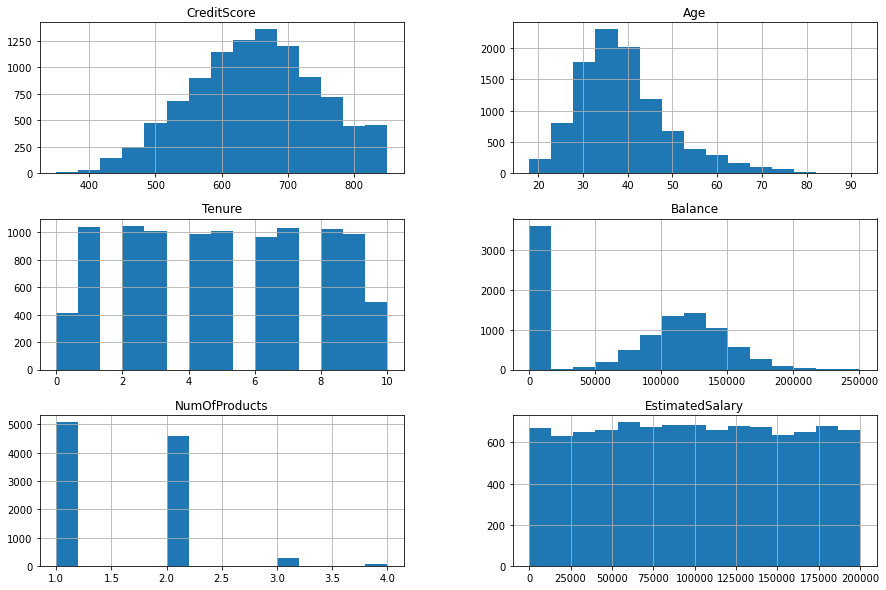

In [11]:
# Plot histograms for numerical features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(3, 2));

In [12]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

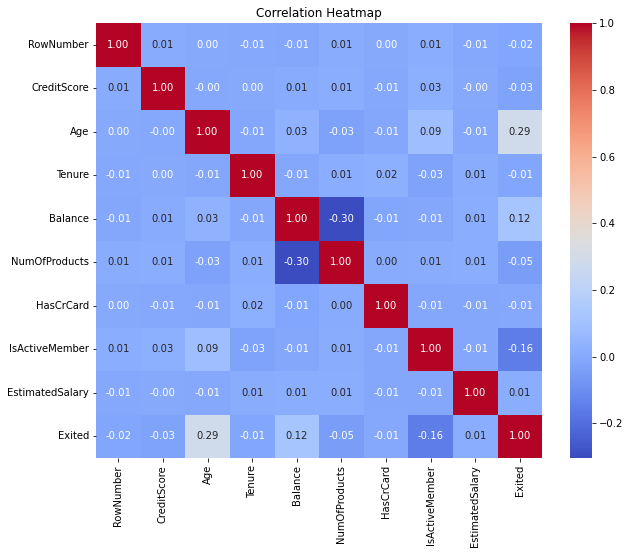

In [13]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap');

# Building a Predictive Model¶
Now that we have a good understanding of the data, let's build a predictive model to identify customers who are likely to churn.

In [14]:
X=df.drop(['RowNumber','Surname','Exited'],axis=1)

In [15]:
Y=df['Exited']

In [16]:
#Convert categorical var to dummy var
X=pd.get_dummies(X,drop_first=True)
#Split data into trainning and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
#Random Forest Classification
model = RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [18]:
Y_pred=model.predict(X_test)

# Evaluate the Model
Let's evaluate the model's performance using accuracy, confusion matrix, and classification report.

In [19]:
#calculate the accuracy 
accuracy = accuracy_score(Y_test,Y_pred)
print(f'Model Accuracy :{accuracy:2f}')

Model Accuracy :0.866500


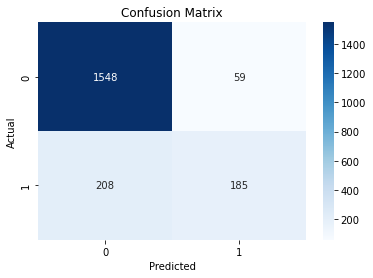

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [21]:
# Classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Conclusion¶
In this notebook, we explored the Bank Customer Churn dataset, performed EDA, and built a predictive model using a Random Forest Classifier. The model achieved a reasonable accuracy, but there's always room for improvement. Future analysis could involve tuning the model's hyperparameters, exploring other algorithms, or incorporating additional features.